In [1]:
from knn import KNN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import utils
import numpy as np

In [2]:
df_train = pd.read_csv('training.csv')
X = df_train.values[:, 0:2].astype(float)  # I want all rows but only the first two cols
y = df_train.values[:, -1] # all rows, last col
# X.shape, y.shape  # (2800, 2) : NxD, (2800, ) : Nx1

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(2240, 2)

In [4]:
df_valid = pd.read_csv('validation.csv')
X_val = df_valid.values[:, 0:2]
y_val = df_valid.values[:, -1]
X_val.shape, y_val.shape

((480, 2), (480,))

In [6]:
# I use the validation set to tune the hyperparameters (k)
best_acc = 0.0
for k in list(range(1, 30, 2)):
    for p in list(range(1, 5)):
        knn_model = KNN(k)
        knn_model.train(X_train, y_train)
        y_pred = knn_model.predict(X_val, p)
        acc = accuracy_score(y_val, y_pred)
        # print(f"accuracy is {acc} with k={k}")
        if acc > best_acc:
            best_acc = acc
            best_k = k
            best_p = p
print(f"Validation accuracy: {best_acc}, k={best_k}, p={best_p}")

Validation accuracy: 0.81875, k=29, p=3


In [7]:
best_knn = KNN(best_k)
best_knn.train(X_train, y_train)
best_ypred = best_knn.predict(X_test, best_p)
test_acc = accuracy_score(y_test, best_ypred)
print(f"Test accuracy: {test_acc}")

Test accuracy: 0.7696428571428572


In [8]:
best_ypred.shape

(560,)

ValueError: not enough values to unpack (expected 2, got 1)

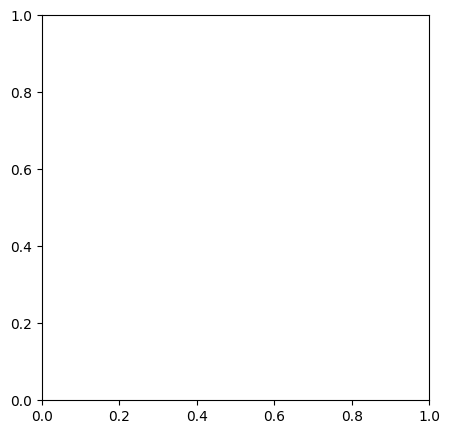

In [11]:
# Create a grid of testing points
h=.02 # space in the grid
x_min = X_train[:, 0].min() - 1 
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1 
y_max = X_train[:, 1].max() + 1
# xx is the x-axis coordinate of the points in the test set
# yy is the y-axis coordinate of the points in the test set
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# X_test contains the test set inputs (xx,yy)
X_test_ = np.c_[xx.ravel(), yy.ravel()]

utils.plot_results(xx, yy, X_train, y_train, best_ypred, 'plot')